# Random Sample Generation and Probability Distributions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

## Notations/Formulas from Probability & Statistics

Mean and Variance of a discrete random varaible $X$ whose probability is given by $p_i = P(X = x_i)$
$$
    \mathbb{E}[X] = \sum_i p(x_i) x_i \\
    \mathbb{E}[(X- \mu)^2] = \sum_i p(x_i) (x_i - \mu)^2
$$

## Gaussian Distribution

- PDF (Probability Density Function) is given by
$$
    p(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{-\frac{1}{2}\frac{(x-m)^2)}{\sigma^2}\bigg\}
$$
- CDF (Cumulative distribution function) is given by
$$
    Prob[X<x_0] = \int_{-\infty}^{x_0} p(x) dx
$$

In [3]:
mean = 0
std = 1
N = 100000

In [4]:
x = np.random.normal(mean, std, N)
x.shape, x[:10]

((100000,),
 array([-0.35992236, -0.03690502,  0.49894642, -0.2477853 ,  1.76489333,
         0.95492557,  1.79128844, -1.19235264, -0.045589  , -0.13389123]))

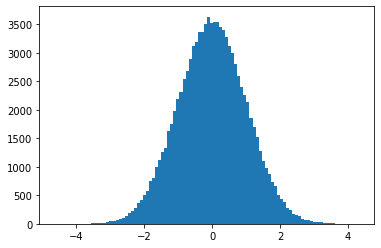

In [5]:
h = plt.hist (x, bins=100)

In [6]:
len(h), h[0].shape, h[1].shape

(3, (100,), (101,))

In [7]:
h[0][:10], h[1][:10]

(array([2., 0., 0., 1., 1., 0., 1., 2., 2., 2.]),
 array([-4.64225084, -4.55251429, -4.46277773, -4.37304118, -4.28330462,
        -4.19356807, -4.10383151, -4.01409495, -3.9243584 , -3.83462184]))

#### The frequency for the bins is recorded in h[0]

In [8]:
freq = h[0]
domain = h[1]

Text(0.5, 1.0, 'frequency plot (histogram)')

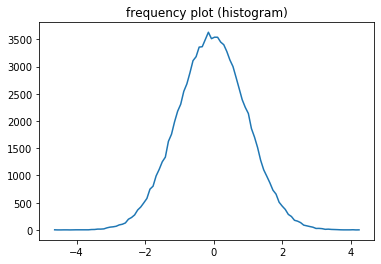

In [9]:
plt.plot (domain[:-1], freq)
plt.title ('frequency plot (histogram)')

Notice that the $x$-axis shows a difference range. It is the number of items in the arrqy `freq`

### Cumulative Frequency Computation

In [10]:
cumfreq = np.zeros_like (freq)
cumfreq[0] = freq[0]
for i in range(1, cumfreq.size):
    cumfreq[i] = cumfreq[i-1] + freq[i]
print ('The last term of CF must be equal to N :', cumfreq[-1] == N)

The last term of CF must be equal to N : True


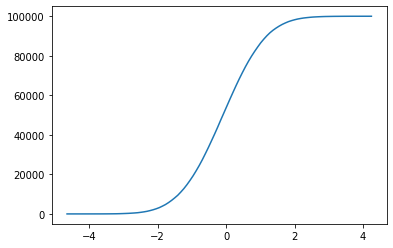

In [11]:
plt.plot (domain[:-1], cumfreq)

In [12]:
normalized_cumfreq = cumfreq / N

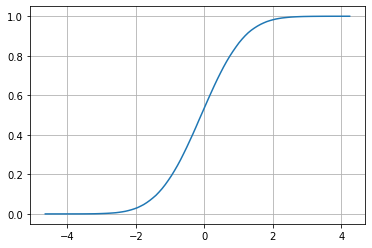

In [13]:
plt.plot (domain[:-1], normalized_cumfreq)
plt.grid(True)

### Samples from the standard normal distribution can also be obtained by `np.random.randn(size)`

In [14]:
y = np.random.randn(N)
y.shape, y[:10]

((100000,),
 array([-0.83023872, -0.20943957, -2.0498865 , -0.54044646, -0.552884  ,
        -0.17071262,  0.45841415,  1.02750239, -1.38471944,  0.11576549]))

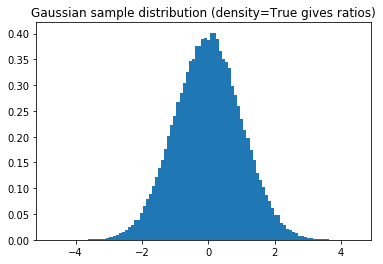

In [15]:
h = plt.hist (y, bins=100, density=True)
_ = plt.title ('Gaussian sample distribution (density=True gives ratios)')

#### Cumulative Frequence

In [16]:
def cumfreq(f, density=False):
    cdf = np.zeros_like (f)
    cdf[0] = f[0]
    for i in range(1, cdf.size):
        cdf[i] = cdf[i-1] + f[i]
    #
    if density:
        cdf /= cdf[-1]
    #
    return cdf

## Random Integer Generation

In [17]:
xint = np.random.randint(10, high=100, size=1000000)

histogram bin size =  101


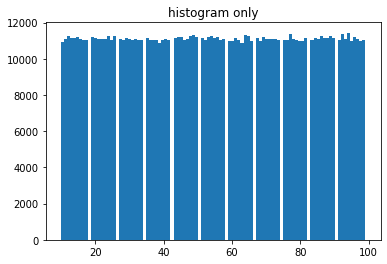

In [18]:
h = plt.hist(xint, bins=100, histtype='stepfilled')
plt.title ('histogram only')
print ('histogram bin size = ', h[1].size)

Text(0.5, 1.0, 'histogram normalized == sample density')

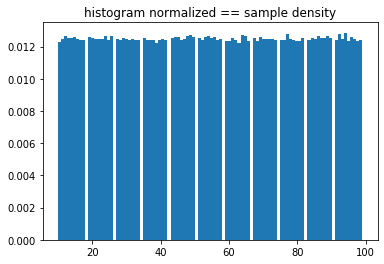

In [19]:
h = plt.hist(xint, bins=100, histtype='stepfilled', density=True)
plt.title ('histogram normalized == sample density')

In [20]:
h[0][:10]

array([0.0122764 , 0.01247528, 0.01263034, 0.01252022, 0.0125573 ,
       0.01257416, 0.01246292, 0.01242247, 0.01238876, 0.        ])

Text(0.5, 1.0, 'cdf of uniform integers [0,100)')

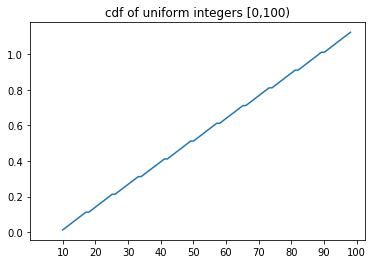

In [21]:
freq = h[0] # this is already normalized. So, the cumulative plot will have 1 at the last index
cdf = cumfreq (freq)
plt.plot (h[1][:-1], cdf)
plt.xlim(left=0)
plt.xticks(np.arange(10, 110, 10))
plt.title ('cdf of uniform integers [0,100)')

#### Histogram using `np.unique()`

In [22]:
unique, count = np.unique(xint, return_counts=True)

Text(0.5, 1.0, 'histogram of intger samples from 10 to 99')

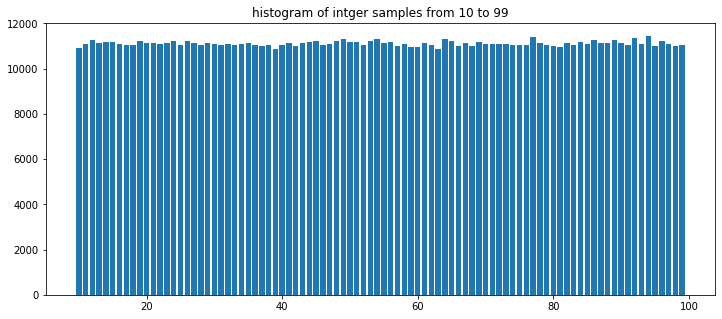

In [23]:
plt.figure(figsize=(12, 5))
plt.bar (unique, count)
plt.title ('histogram of intger samples from 10 to 99')

Text(0.5, 1.0, 'sample density from the integer samples [10, 99] or [10, 100) ')

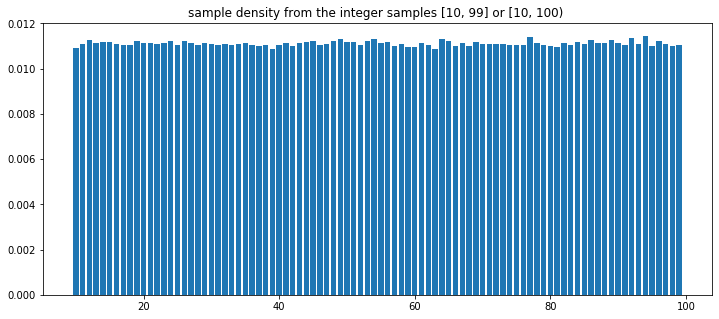

In [24]:
plt.figure(figsize=(12, 5))
plt.bar (unique, count/xint.shape[0])
plt.title ('sample density from the integer samples [10, 99] or [10, 100) ')

## Bernoulli Distribution
- https://en.wikipedia.org/wiki/Bernoulli_distribution

- Parameter
$$ Pr(X = 1) = p $$

- Probability Mass  Function (PMF) 
$$
   Pr(X = y) = p^y (1 - p)^{(1-y)}, \quad y \in \{ 0, 1 \}
$$

In [25]:
ntrial = 1
p = 0.3

# To examine the outpus
x = np.random.binomial(ntrial, p, 100)
x

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

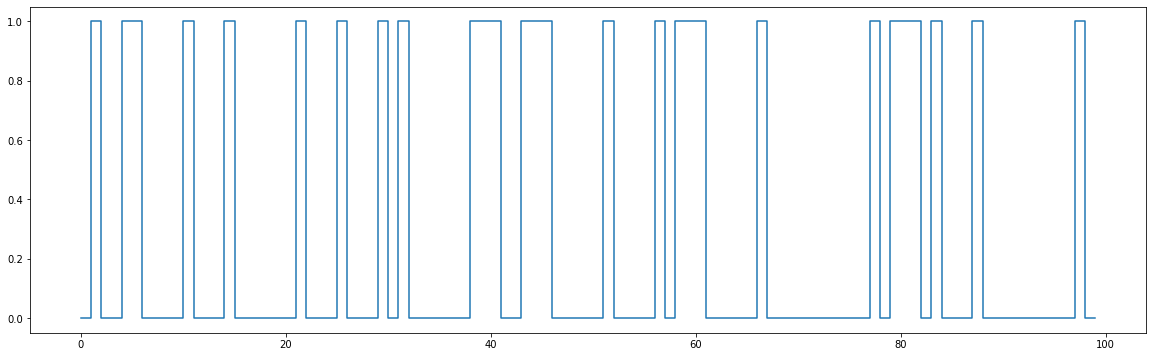

In [26]:
plt.figure(figsize=(20,6))
plt.plot (x, drawstyle='steps')

In [27]:
x = np.random.binomial (ntrial, p, 100000)

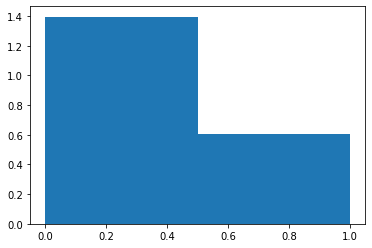

In [28]:
h = plt.hist (x, bins=2, density=True)

In [29]:
h[0], h[1]

(array([1.3962, 0.6038]), array([0. , 0.5, 1. ]))

## Binomial Distribution
- https://en.wikipedia.org/wiki/Binomial_distribution
    - In general, if the random variable X follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write $X \sim B(n, p)$.
    
- PMF
$$
    Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}
$$

In [30]:
ntrial = 100
p = 0.3

xbino = np.random.binomial(n=ntrial, p=p, size=1000)

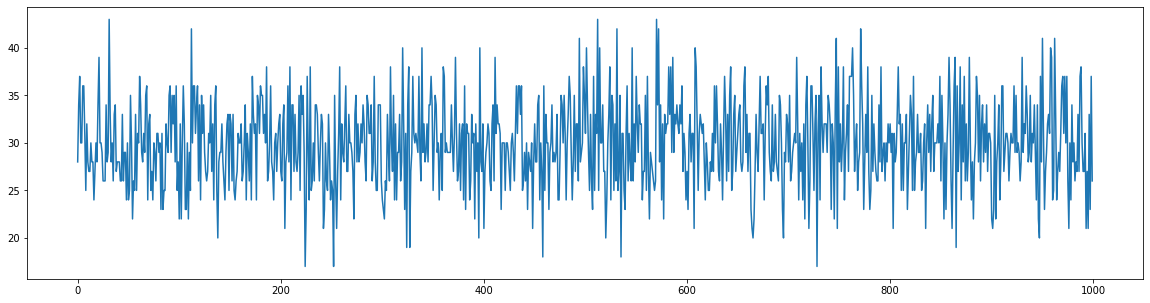

In [31]:
plt.figure (figsize=(20,5))
h = plt.plot (xbino)

In [32]:
# summary of the generated numbers
np.unique (xbino)

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [33]:
xbino = np.random.binomial (n=ntrial, p=p, size=1000000)

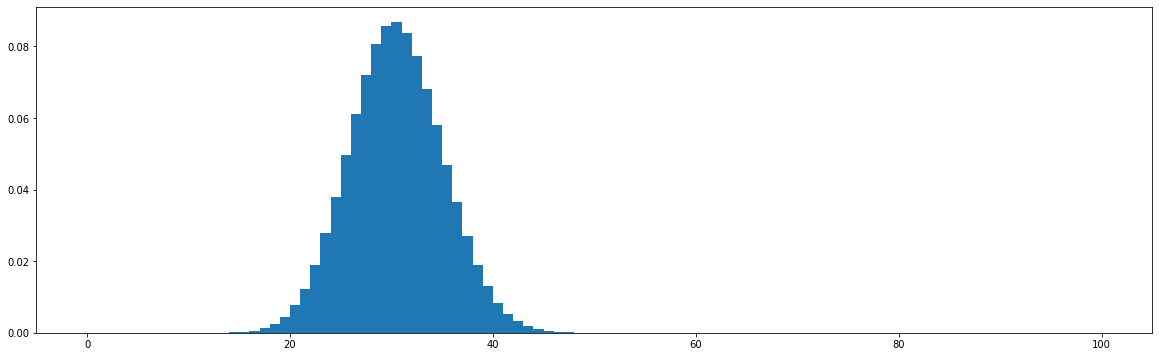

In [34]:
bins = [i for i in range(101)] # discrete bins

plt.figure (figsize=(20,6))
h = plt.hist (xbino, bins=bins, density=True, histtype='stepfilled')

<BarContainer object of 100 artists>

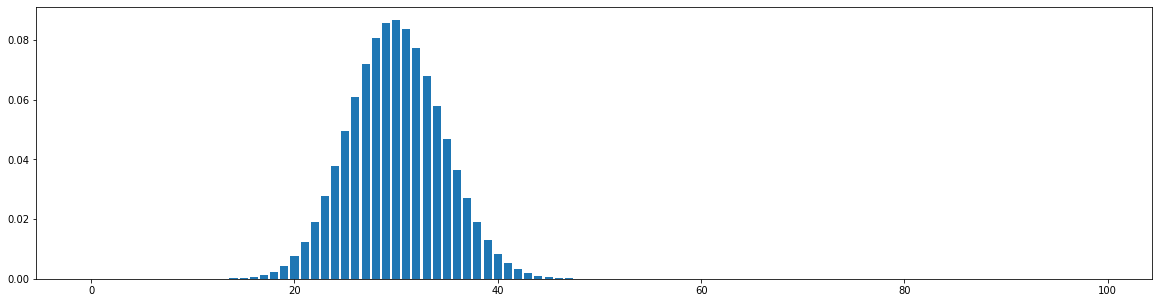

In [35]:
xcoord = [i for i in range(h[0].size)]

plt.figure (figsize=(20,5))
plt.bar (xcoord, h[0])

### Histogram with `np.unique()`

In [36]:
unique, counts = np.unique (xbino, return_counts=True)
unique, counts

(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 53]),
 array([    4,    14,    36,   101,   228,   572,  1234,  2426,  4293,
         7692, 12321, 18944, 27871, 37957, 49685, 61020, 71913, 80542,
        85641, 86756, 83794, 77395, 67992, 58027, 46901, 36567, 26995,
        18973, 12968,  8449,  5353,  3256,  1915,  1100,   551,   265,
          141,    60,    23,    14,     8,     3]))

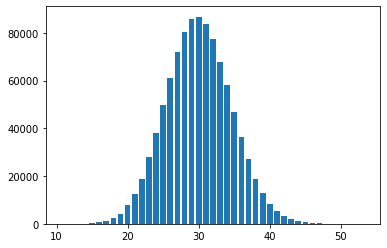

In [37]:
_ = plt.bar (unique, counts)

Text(0.5, 1.0, 'sample distribution from binomial(ntrial=100, p=0.3)')

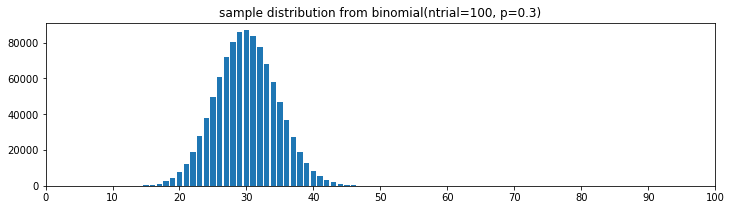

In [38]:
plt.figure (figsize=(12,3))
plt.bar (unique, counts)
plt.xticks (np.arange(start=0, stop=ntrial+1, step=10))
plt.title ('sample distribution from binomial(ntrial={}, p={})'.format(ntrial, p))

#### Sample CDF

In [39]:
cdf = np.zeros_like (counts)
cdf[0] = counts[0]
for i in range(1, unique.shape[0]):
    cdf[i] += cdf[i-1] + counts[i]

Text(0.5, 1.0, 'Cumulative disribution of samples from binomial(ntrial=100, p=0.3)')

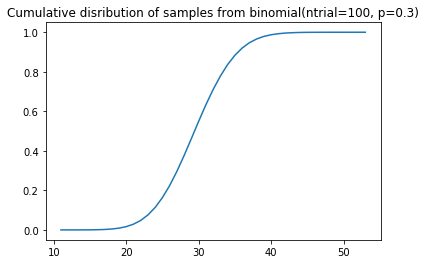

In [40]:
plt.plot (unique, cdf/cdf[-1])
plt.title ('Cumulative disribution of samples from binomial(ntrial={}, p={})'.format(ntrial, p))

## Histogram for Discrete Variables using python dictionary

In [41]:
xbino.min(), xbino.max()

(11, 53)

### Use dictionary object for histogram data

In [42]:
hist = { i : 0 for i in range (xbino.min(), xbino.max()+1, 1) }
for n in xbino:
    hist[n] += 1

In [43]:
hist.keys()

dict_keys([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])

<BarContainer object of 43 artists>

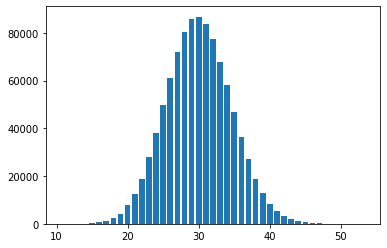

In [44]:
# with proper x-range
plt.bar(hist.keys(), hist.values())

## scipy.stats
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cumfreq.html

In [45]:
import scipy.stats

In [46]:
samples = np.random.randn (1000)

res = scipy.stats.cumfreq (samples)
x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)

Text(0.5, 1.0, 'Cumulative histogram')

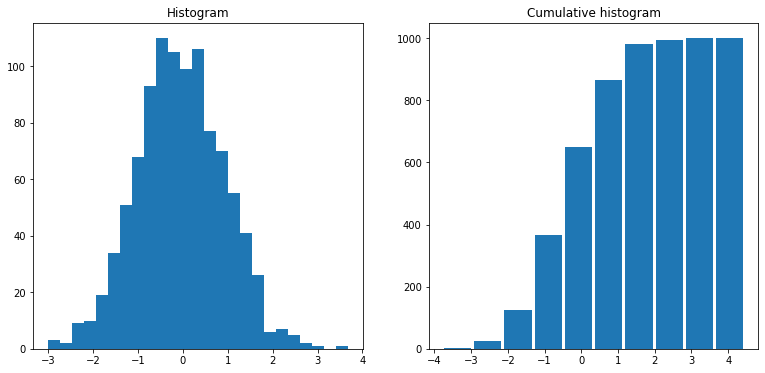

In [47]:
fig = plt.figure (figsize=(13,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist (samples, bins=25)
ax1.set_title ('Histogram')
ax2.bar (x, res.cumcount, width=res.binsize)
ax2.set_title ('Cumulative histogram')
#ax2.set_xlim ([x.min(), x.max()])

## (extra) How many times will a fair die land on the same number (e.g. 5) out of 100 trials.
    - use 'np.random.binomial(n=100, p=1/6., size=N)` to generate the samples.
    - base event set = { face is 5, face is not 5 }, so it is binary. (the same applies to other numbers each)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# great seed
np.random.seed(1337)

In [49]:
# how many times will a fair die land on the same number out of 100 trials.
data = np.random.binomial(n=100, p=1/6, size=1000)

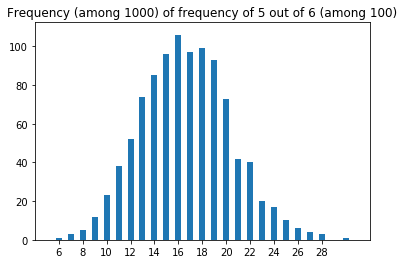

In [50]:
values, counts = np.unique(data, return_counts=True) # can be used to construct a histogram of discrete dataset

plt.vlines(values, 0, counts, color='C0', lw=6)

plt.title ('Frequency (among 1000) of frequency of 5 out of 6 (among 100)')
# optionally set y-axis up nicely
plt.ylim(0, max(counts) * 1.06)
plt.xlim(values.min()-2, values.max()+2)
_ = plt.xticks(values[::2])

In [51]:
print ('Sample mean says that 5 will appear {} times on average out of 100 trials'.format(data.mean()))

Sample mean says that 5 will appear 16.651 times on average out of 100 trials


In [52]:
print ('Sample probability: p = ', data.mean() / 100, '\nNotice: True p = ', 1/6)

Sample probability: p =  0.16651 
Notice: True p =  0.16666666666666666


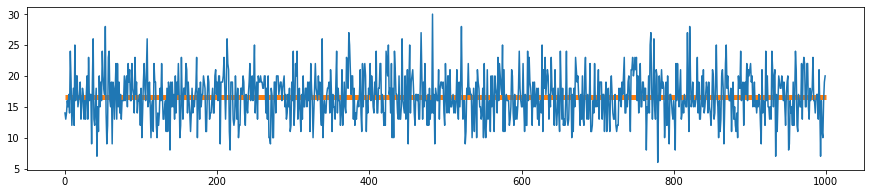

In [53]:
plt.figure(figsize=(15,3))
plt.hlines(data.mean(), xmin=0, xmax=data.size, color='C1', lw=5)
_ = plt.plot (data)

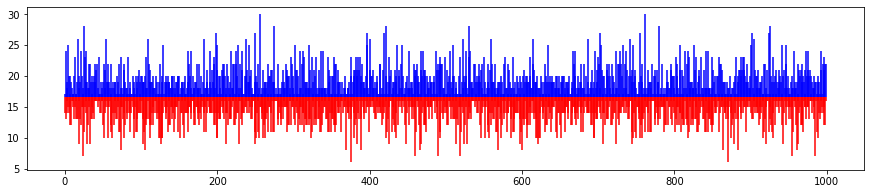

In [54]:
plt.figure(figsize=(15,3))
plt.vlines (np.arange(data.size), data.mean(), data[data>data.mean()], color='b')
plt.vlines (np.arange(data.size), data.mean(), data[data<=data.mean()], color='r')

## END